In [2]:
import string

# Method 1: Using string module to get all printable characters
all_characters = string.ascii_letters + string.digits
print("All printable characters:", all_characters)
print("Length:", len(all_characters))

All printable characters: abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789
Length: 62


In [4]:
from itertools import combinations

def create_input_string(base_chars, length):
    
    if isinstance(base_chars, str):
        input_string = list(base_chars)
    else:
        input_string = base_chars.copy()

    def add_combinations(s, r):
        for i in combinations(base_chars, r):
            if len(s) >= length:  # Stop if we've reached desired length
                break
            s.append(''.join(i))
        return s

    choose = 2    
    while len(input_string) < length:
        input_string = add_combinations(input_string, choose)
        choose += 1

    if len(input_string) >= length:
        return input_string[:length]

In [5]:
input_string = create_input_string(string.ascii_letters + string.digits, 100000)

In [7]:
input_string

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'ab',
 'ac',
 'ad',
 'ae',
 'af',
 'ag',
 'ah',
 'ai',
 'aj',
 'ak',
 'al',
 'am',
 'an',
 'ao',
 'ap',
 'aq',
 'ar',
 'as',
 'at',
 'au',
 'av',
 'aw',
 'ax',
 'ay',
 'az',
 'aA',
 'aB',
 'aC',
 'aD',
 'aE',
 'aF',
 'aG',
 'aH',
 'aI',
 'aJ',
 'aK',
 'aL',
 'aM',
 'aN',
 'aO',
 'aP',
 'aQ',
 'aR',
 'aS',
 'aT',
 'aU',
 'aV',
 'aW',
 'aX',
 'aY',
 'aZ',
 'a0',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'a6',
 'a7',
 'a8',
 'a9',
 'bc',
 'bd',
 'be',
 'bf',
 'bg',
 'bh',
 'bi',
 'bj',
 'bk',
 'bl',
 'bm',
 'bn',
 'bo',
 'bp',
 'bq',
 'br',
 'bs',
 'bt',
 'bu',
 'bv',
 'bw',
 'bx',
 'by',
 'bz',
 'bA',
 'bB',
 'bC',
 'bD',
 'bE'

In [7]:
len(input_string) == len(set(input_string))  # Check for uniqueness

True

In [8]:
def sequential_search(s, x):
    """A simple sequential search function.
    Args:
        s (str or list): The input string or list of characters to search through.
        x (any): The element to search for.
    Returns:
        int: 1 if found, 0 otherwise.
    """
    for i in range(len(s)):
        if s[i] == x:
            return 1
    return 0

def create_chunks(s, p):
    """Splits the string s into p chunks.
    Args:
        s (str or list): The input string or list of characters to split.
        p (int): The number of chunks to create.
        Returns:
            list: A list containing p chunks of the input string.
    """
    chunk_size = len(s) // p
    chunks = []
    for i in range(p):
        start_index = i * chunk_size
        if i == p - 1:  # Last chunk takes the remainder
            end_index = len(s)
        else:
            end_index = (i + 1) * chunk_size
        chunks.append(s[start_index:end_index])
    return chunks

def search_processor(args):
    """Worker function for parallel search that can be pickled."""
    chunk, target = args
    return sequential_search(chunk, target)

def parallel_search(s, x, p):
    """
    Performs a parallel search for element x in string s using p processes.
    Args:
        s (str or list): The input string or list of characters to search through.
        x (any): The element to search for.
        p (int): The number of parallel processes to use.

    Returns:
        int: 1 if found, 0 otherwise.
    """
    from concurrent.futures import ProcessPoolExecutor
    chunks = create_chunks(s, p)

    # Create arguments as (chunk, target) pairs
    processor_args = [(chunk, x) for chunk in chunks]

    with ProcessPoolExecutor(max_workers=p) as executor:
        results = list(executor.map(search_processor, processor_args))

    return 1 if any(results) else 0

In [ ]:
if __name__ == '__main__':
    input_sequence = create_input_string(all_characters, 10000000)
    x = input_sequence[-1]

    import time

    # Time sequential search
    start = time.perf_counter()
    seq_result = sequential_search(input_sequence, x)
    seq_time = time.perf_counter() - start
    print(f"Sequential search time: {seq_time:.6f} seconds")

    # Time parallel search
    start = time.perf_counter()
    par_result = parallel_search(input_sequence, x, 7)
    par_time = time.perf_counter() - start
    print(f"Parallel search time: {par_time:.6f} seconds")

    # Calculate speedup
    if par_time > 0:
        speedup = seq_time / par_time
        print(f"Speedup: {speedup:.2f}x")

Sequential search time: 7.603054 seconds


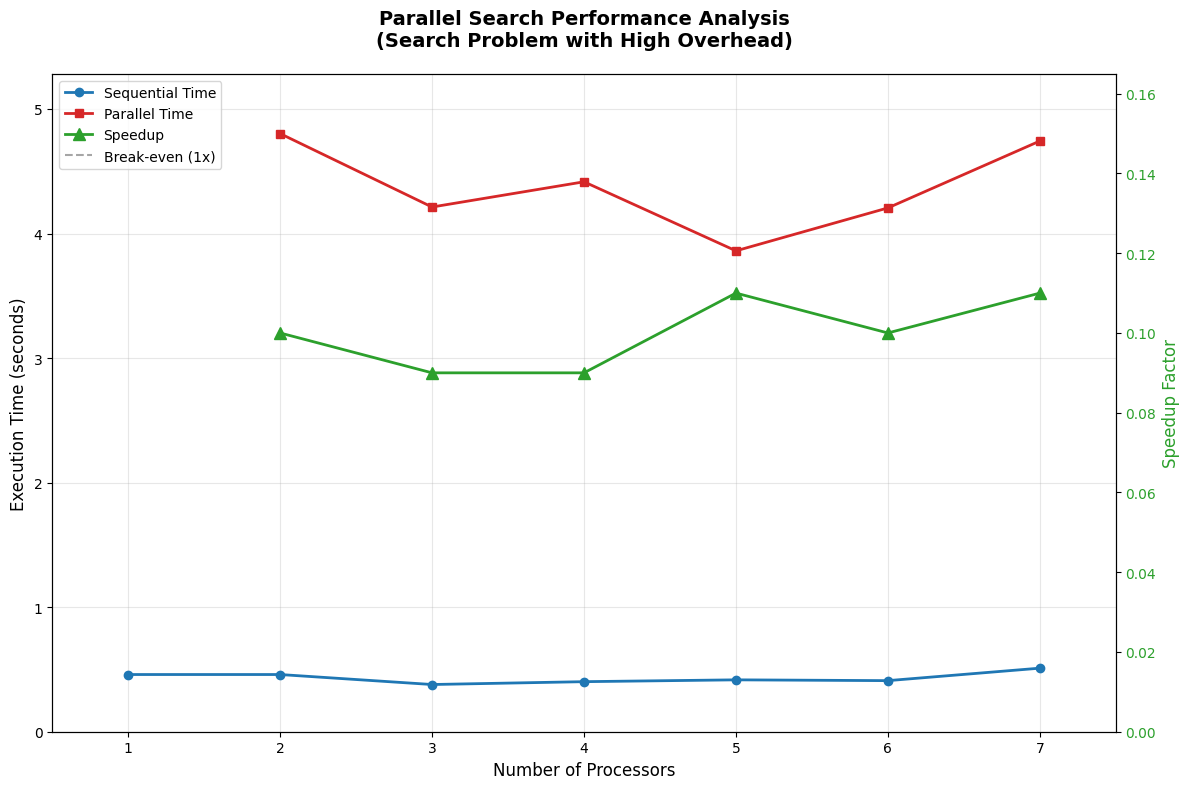

Performance Analysis Summary:
Average sequential time: 0.434s
Average parallel time: 4.373s
Average speedup: 0.100x
Parallel is 10.1x SLOWER
Overhead dominates by factor of 10


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
processor = [1, 2, 3, 4, 5, 6, 7]
sequential_time = [0.459240, 0.459240, 0.379019, 0.401880, 0.416549, 0.410163, 0.510367]
parallel_time = [None, 4.802532, 4.212857, 4.415513, 3.861089, 4.205856, 4.742988]
speedup = [None, 0.10, 0.09, 0.09, 0.11, 0.10, 0.11]

# Filter out None values for parallel processing (skip single processor)
processors_parallel = processor[1:]  # Skip first element (1 processor)
parallel_time_clean = parallel_time[1:]  # Skip None
speedup_clean = speedup[1:]  # Skip None

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot times on left y-axis
color1 = 'tab:blue'
color2 = 'tab:red'
ax1.set_xlabel('Number of Processors', fontsize=12)
ax1.set_ylabel('Execution Time (seconds)', color='black', fontsize=12)

# Plot sequential time (constant across all processors)
line1 = ax1.plot(processor, sequential_time, 'o-', color=color1, linewidth=2, 
                markersize=6, label='Sequential Time')

# Plot parallel time (starting from 2 processors)
line2 = ax1.plot(processors_parallel, parallel_time_clean, 's-', color=color2, 
                linewidth=2, markersize=6, label='Parallel Time')

ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, alpha=0.3)

# Create second y-axis for speedup
ax2 = ax1.twinx()
color3 = 'tab:green'
ax2.set_ylabel('Speedup Factor', color=color3, fontsize=12)

# Plot speedup
line3 = ax2.plot(processors_parallel, speedup_clean, '^-', color=color3, 
                linewidth=2, markersize=8, label='Speedup')

ax2.tick_params(axis='y', labelcolor=color3)

# Add horizontal line at speedup = 1 (break-even point)
ax2.axhline(y=1, color='gray', linestyle='--', alpha=0.7, label='Break-even (1x)')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

# Set title and improve layout
plt.title('Parallel Search Performance Analysis\n(Search Problem with High Overhead)', 
          fontsize=14, fontweight='bold', pad=20)

# Set x-axis to show all processor counts
ax1.set_xticks(processor)
ax1.set_xlim(0.5, 7.5)

# Improve y-axis limits
ax1.set_ylim(0, max(max(sequential_time), max(parallel_time_clean)) * 1.1)
ax2.set_ylim(0, max(speedup_clean) * 1.5)

plt.tight_layout()
plt.show()

# Print analysis
print("Performance Analysis Summary:")
print("=" * 40)
print(f"Average sequential time: {np.mean(sequential_time):.3f}s")
print(f"Average parallel time: {np.mean(parallel_time_clean):.3f}s")
print(f"Average speedup: {np.mean(speedup_clean):.3f}x")
print(f"Parallel is {np.mean(parallel_time_clean)/np.mean(sequential_time):.1f}x SLOWER")
print(f"Overhead dominates by factor of {1/np.mean(speedup_clean):.0f}")